In [1]:
import pandas as pd
from altadata.altadata import *
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Gathering Data

In [2]:
api_key = "YOUR_API_KEY"
product_code = "co_10_jhucs_03"

client = AltaDataAPI(api_key, dataframe_functionality=True)
data = client.get_data(product_code).load()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16084 entries, 0 to 16083
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reported_date           16084 non-null  object 
 1   province_state          16084 non-null  object 
 2   population              14404 non-null  float64
 3   lat                     15512 non-null  float64
 4   lng                     15512 non-null  float64
 5   confirmed               16084 non-null  float64
 6   prev_confirmed_1d       16025 non-null  float64
 7   new_confirmed           16025 non-null  float64
 8   peak_confirmed_1d_flag  16084 non-null  bool   
 9   active                  16067 non-null  float64
 10  deaths                  16084 non-null  float64
 11  prev_deaths_1d          16025 non-null  float64
 12  new_deaths              16025 non-null  float64
 13  most_deaths_1d_flag     16084 non-null  bool   
 14  recovered               12931 non-null

## Preprocessing the data

In [4]:
data.dropna(subset = ["population"], inplace=True)
data.fillna(value=0, inplace=True)

data = data.astype({"population": int, 
                  "confirmed": int,
                  "new_confirmed": int,
                  "active": int,
                  "deaths": int,
                  "new_deaths": int,
                  "recovered": int})

In [5]:
data.sort_values(by='reported_date', inplace=True)

last_date = data['reported_date'].unique()[-1]
last_week_date = data['reported_date'].unique()[-7]
last_month_date = data['reported_date'].unique()[-30]

last_day = data[data.reported_date == last_date]
last_week = data[data.reported_date >= last_week_date]
last_month = data[data.reported_date >= last_month_date]

print(last_date)
print(last_week_date)
print(last_month_date)

2021-01-13
2021-01-07
2020-12-15


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14404 entries, 0 to 16083
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reported_date           14404 non-null  object 
 1   province_state          14404 non-null  object 
 2   population              14404 non-null  int64  
 3   lat                     14404 non-null  float64
 4   lng                     14404 non-null  float64
 5   confirmed               14404 non-null  int64  
 6   prev_confirmed_1d       14404 non-null  float64
 7   new_confirmed           14404 non-null  int64  
 8   peak_confirmed_1d_flag  14404 non-null  bool   
 9   active                  14404 non-null  int64  
 10  deaths                  14404 non-null  int64  
 11  prev_deaths_1d          14404 non-null  float64
 12  new_deaths              14404 non-null  int64  
 13  most_deaths_1d_flag     14404 non-null  bool   
 14  recovered               14404 non-null

In [7]:
data.head()

,reported_date,province_state,population,lat,lng,confirmed,prev_confirmed_1d,new_confirmed,peak_confirmed_1d_flag,active,...,prev_deaths_1d,new_deaths,most_deaths_1d_flag,recovered,hospitalization_rate,incidence_rate,mortality_rate,people_hospitalized,people_tested,testing_rate
0,2020-04-12,Alabama,4903185,32.3182,-86.9023,3667,0.0,0,False,3470,...,0.0,0,False,0,12.26,75.99,2.61,437.0,21583.0,460.30
7202,2020-04-12,Michigan,9986857,43.3266,-84.5361,24244,0.0,0,False,22765,...,0.0,0,False,433,15.00,304.30,6.10,3636.0,79437.0,997.04
7756,2020-04-12,Mississippi,2976149,32.7416,-89.6787,2781,0.0,0,False,2685,...,0.0,0,False,0,19.71,96.06,3.45,548.0,21413.0,739.60
277,2020-04-12,Alaska,731545,61.3707,-152.4044,272,0.0,0,False,264,...,0.0,0,False,66,11.40,45.50,2.94,31.0,8038.0,1344.71
8033,2020-04-12,Missouri,6137428,38.4561,-92.2884,4269,0.0,0,False,4151,...,0.0,0,False,0,23.14,72.86,2.76,988.0,45200.0,771.40


## Data Visualization

## Top 10 States based on new deaths

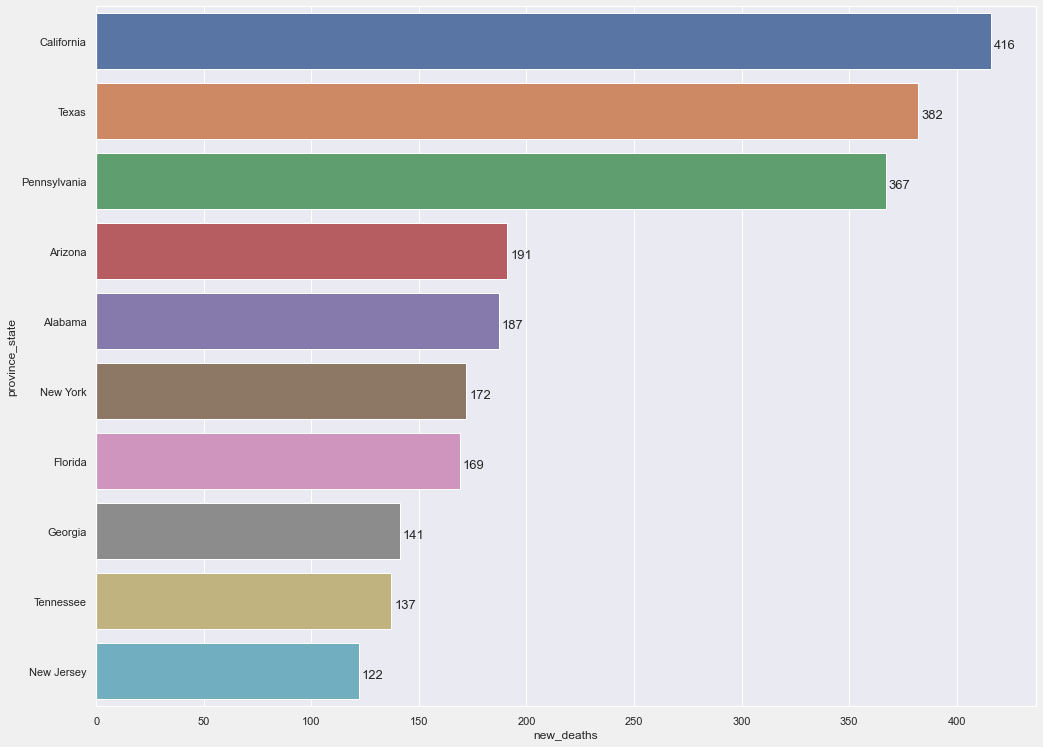

In [16]:
top_ten = last_day.sort_values(by='new_deaths', ascending=False).head(10)

plt.figure(figsize=(15,12))

sns.set_theme(style="darkgrid")
plot = sns.barplot(x='new_deaths', y='province_state', data=top_ten)

for i,(value,name) in enumerate(zip(top_ten['new_deaths'], top_ten['province_state'])):
    plot.text(value+1.5, i+0.1, f'{value:,.0f}', size=13)

#plt.savefig("output.png")    
    
plt.show()

## Top 10 States based on new cases

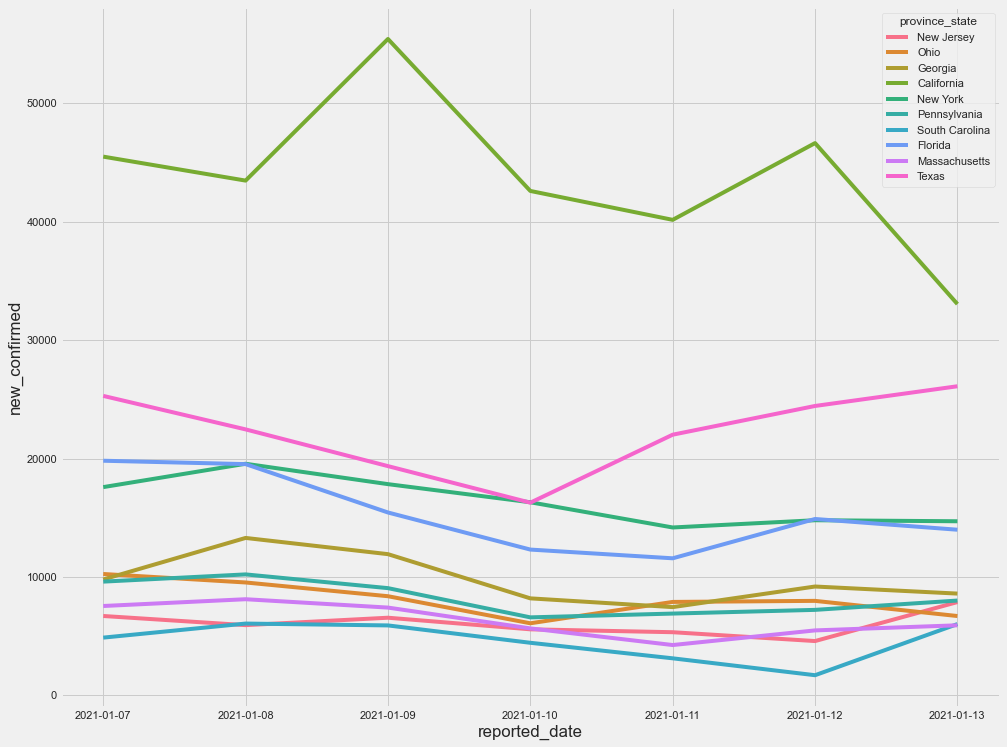

In [19]:
top_ten_states = last_day.sort_values(by='new_confirmed', ascending=False).province_state.values[:10]
top_ten = last_week[last_week.province_state.isin(top_ten_states)]

plt.figure(figsize=(15,12))

plt.style.use('fivethirtyeight')
sns.lineplot(x="reported_date", y="new_confirmed", hue="province_state", linewidth=4, data=top_ten)

#plt.savefig("output2.png")

plt.show()

## Last Month California

<Figure size 1080x864 with 0 Axes>

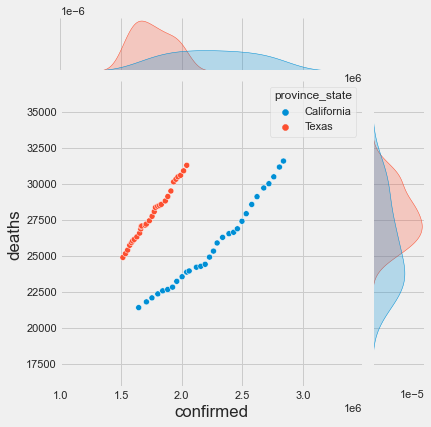

In [28]:
california_texas = last_month[last_month.province_state.isin(['California', 'Texas'])]

plt.figure(figsize=(15,12))
sns.jointplot(x="confirmed", y="deaths", hue='province_state', data=california_texas)

#plt.savefig("output3.png")

plt.show()

## USA Map

In [11]:
usa_covid_map = folium.Map(location = [41.850033, -87.6500523], zoom_start=4)

zipped_data = zip(list(last_day['province_state']),
                  list(last_day['lat']),
                  list(last_day['lng']),
                  list(last_day['confirmed']),
                  list(last_day['new_confirmed']),
                  list(last_day['deaths']),
                  list(last_day['new_deaths']),
                  list(last_day['recovered']))

for state, lat, long, total_confirmed, new_confirmed, total_deaths, new_deaths, total_recovered in zipped_data:
    popup_content = ('<b>State  : '+ str(state) + '<br>' +
            '<b>Total Confirmed Cases : '+ str(total_confirmed) +'<br>' +
            '<b>New Confirmed Cases : '+ str(new_confirmed) +'<br>' +
            '<font color=red>Total Deaths : </font>'+ str(total_deaths) +'<br>' +
            '<font color=red>New Deaths : </font>'+ str(new_deaths) +'<br>' +
            '<font color=green>Total Recovered Cases : </font>'+ str(total_recovered) +'<br>')
    
    folium.CircleMarker(location = [lat,long],
                       radius = 4,
                       color='red',
                       fill = True,
                       fill_color="red").add_to(usa_covid_map)
    
    folium.Marker(location = [lat,long],
          popup=folium.Popup(popup_content, max_width=200)).add_to(usa_covid_map)

usa_covid_map